SyntaxError: ignored

Danny Ryan
Lab5
2/24/20

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
file_link = 'https://drive.google.com/uc?export=download&id=1izidngrqxWsq-1z-AgOcZIpF5F51CRQr'
df = pd.read_csv(file_link)
df

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
0,1,M,45000,25,32,2.5,Action,Yes
1,2,F,54000,33,12,3.4,Drama,No
2,3,F,32000,20,42,1.6,Comedy,No
3,4,F,59000,70,16,4.2,Drama,Yes
4,5,M,37000,35,25,3.2,Action,Yes
5,6,M,18000,20,29,1.7,Action,No
6,7,F,29000,45,19,3.8,Drama,No
7,8,M,74000,25,31,2.4,Action,Yes
8,9,M,38000,21,18,2.1,Comedy,No
9,10,F,65000,40,21,3.3,Drama,No


In [ ]:
df.head(5)

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
0,1,M,45000,25,32,2.5,Action,Yes
1,2,F,54000,33,12,3.4,Drama,No
2,3,F,32000,20,42,1.6,Comedy,No
3,4,F,59000,70,16,4.2,Drama,Yes
4,5,M,37000,35,25,3.2,Action,Yes


In [ ]:
X = df[['Gender','Income', 'Age', 'Rentals', 'Avg Per Visit', 'Genre']]
y = df['Incidentals'].astype('category').cat.codes.values
X

,Gender,Income,Age,Rentals,Avg Per Visit,Genre
0,M,45000,25,32,2.5,Action
1,F,54000,33,12,3.4,Drama
2,F,32000,20,42,1.6,Comedy
3,F,59000,70,16,4.2,Drama
4,M,37000,35,25,3.2,Action
5,M,18000,20,29,1.7,Action
6,F,29000,45,19,3.8,Drama
7,M,74000,25,31,2.4,Action
8,M,38000,21,18,2.1,Comedy
9,F,65000,40,21,3.3,Drama


In [ ]:
X = pd.get_dummies(X)

In [ ]:
X

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
0,45000,25,32,2.5,0,1,1,0,0
1,54000,33,12,3.4,1,0,0,0,1
2,32000,20,42,1.6,1,0,0,1,0
3,59000,70,16,4.2,1,0,0,0,1
4,37000,35,25,3.2,0,1,1,0,0
5,18000,20,29,1.7,0,1,1,0,0
6,29000,45,19,3.8,1,0,0,0,1
7,74000,25,31,2.4,0,1,1,0,0
8,38000,21,18,2.1,0,1,0,1,0
9,65000,40,21,3.3,1,0,0,0,1


In [ ]:
Xn = (X-X.min())/(X.max()-X.min())


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(Xn , y, test_size = 0.3, random_state = 0)

In [ ]:
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
model.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
ypred = model.predict(xtest)

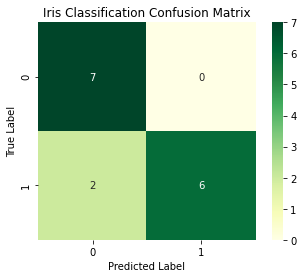

In [ ]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGn",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Iris Classification Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.75      0.86         8

    accuracy                           0.87        15
   macro avg       0.89      0.88      0.87        15
weighted avg       0.90      0.87      0.87        15



In [ ]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, Xn, y, cv=5)
results

array([0.8, 0.4, 0.8, 0.7, 0.7])

What is the precision for class 0? What does this mean in English?

Of all of the precitions for class 0, 7 out of 9 were correct. In english, this means how accurte the predictions were when class 0 was predicted

What is the math to calculate this precision value? (I.e., which values from the confusion matrix get added and divided to get the precision?)

actual class 0/predicted class 0
7/9

What is the recall for class 1? What does this mean in English?

Recall is the percentage of the class that is correctly identified 

What is the math to calculate this recall value? (I.e., which values from the confusion matrix get added and divided to get the recall?)

6/8

What is the overall accuracy?

87%

What is the math to calculate this accuracy value? (I.e., which values from the confusion matrix get added and divided to get the accuracy?)

left diagnoal of the matrix/ sum of the matrix 

In [ ]:
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='uniform')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 29),
              'metric': ['euclidean', 'manhattan'],
              'weights': ['uniform', 'distance']}

grid = GridSearchCV(model, param_grid, cv=5, verbose=1)

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [ ]:
model = grid.best_estimator_
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.88      0.93         8

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



In a text cell, discuss whether this final model is better than your initial model and how the parameters differ.


The final model using five folds was more accurete, as its final accurecy of 93 percent is greater than the previous model with 87 percent accurecy. Also, the percision of 0 and the recall of 1 increased. 



What happens if we use the training data to test our model? I.e., use the trained model to make predictions about the training data?

It would be 100% (too accurete) as it would be tested on the data that generated the model, so that would prove you did a good job modeling the training data, but it does not prove your model works for other data.